# Предсказание курса криптовалюты

In [2]:
import pandas as pd

In [3]:
bitcoin = pd.read_csv('/content/sample_data/BTCUSD_daily.csv', index_col=0)

*цена на открытие , закрытие, объем торгов, *

In [4]:
bitcoin.describe()

,open,high,low,close,Volume USD,Volume BTC
count,2652.000000,2652.000000,2652.000000,2652.000000,2.652000e+03,2652.000000
mean,12817.097939,13186.267542,12399.817371,12828.207655,1.497664e+08,18381.609947
std,16824.413997,17289.418026,16283.433540,16826.150324,2.171489e+08,20526.790610
min,212.630000,223.200000,162.000000,212.630000,0.000000e+00,0.000000
25%,756.692500,773.582500,743.492500,766.082500,1.362017e+07,5678.644934
50%,6753.050000,6939.300000,6602.450000,6756.100000,6.404094e+07,10971.855000
75%,11473.000000,11791.500000,11124.500000,11478.250000,2.004097e+08,23124.732500
max,67526.000000,68958.000000,66326.000000,67526.000000,2.491339e+09,266768.610000


In [5]:
bitcoin.date = pd.to_datetime(bitcoin.date) #привеcти к формату дата

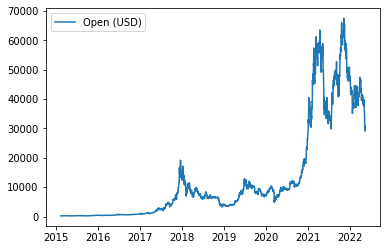

In [6]:
import matplotlib.pyplot as plt

plt.plot(bitcoin.date, bitcoin.open, label='Open (USD)')
plt.legend() #отобразить легенду
plt.show() #отобразить график


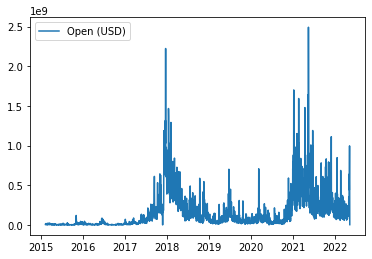

In [7]:
import matplotlib.pyplot as plt

plt.plot(bitcoin.date, bitcoin['Volume USD']	, label='Open (USD)')
plt.legend() #отобразить легенду
plt.show() #отобразить график


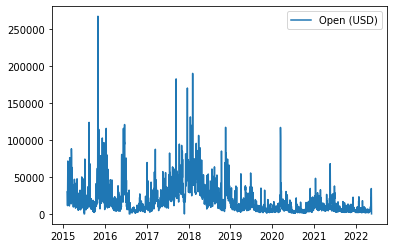

In [8]:
import matplotlib.pyplot as plt

plt.plot(bitcoin.date, bitcoin['Volume BTC']	, label='Open (USD)')
plt.legend() #отобразить легенду
plt.show() #отобразить график

Вывод: **Цена выросла и теперь за эти деньги можно купить меньше монет** **Текст, выделенный полужирным шрифтом**

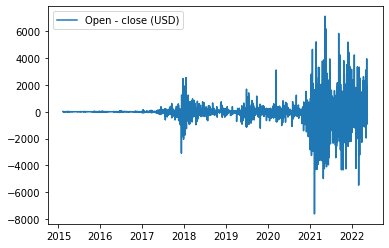

In [9]:
import matplotlib.pyplot as plt
# разница графиков цены открытия и закрытия
plt.plot(bitcoin.date,  bitcoin.open-bitcoin.close, label='Open - close (USD)')
plt.legend() #отобразить легенду
plt.show() #отобразить график

In [10]:
bitcoin.date

0      2015-02-09
1      2015-02-10
2      2015-02-11
3      2015-02-12
4      2015-02-13
          ...    
2647   2022-05-10
2648   2022-05-11
2649   2022-05-12
2650   2022-05-13
2651   2022-05-14
Name: date, Length: 2652, dtype: datetime64[ns]

In [11]:
bitcoin['openClose'] = bitcoin.open - bitcoin.close
bitcoin['highlow'] = bitcoin.high - bitcoin.low

bitcoin['open_high'] = bitcoin['openClose'] / bitcoin['highlow']

bitcoin['month'] = bitcoin.date.dt.month
bitcoin['year'] = bitcoin.date.dt.year
bitcoin['weekday'] = bitcoin.date.dt.weekday

In [12]:
bitcoin.groupby('weekday')['open'].mean()
# для каждого дня недели получаем среднюю цену открытия

weekday
0    12780.331231
1    12816.260321
2    12811.281318
3    12859.977424
4    12805.182160
5    12830.904546
6    12815.745005
Name: open, dtype: float64

In [13]:
# Средняя цена открытия за последние 7 дней
# Скользящие окна
bitcoin['open_mean_7d'] = bitcoin['open'].shift(1).rolling(window=7).mean() # shift сдвиг на 1 день
bitcoin['max_volume_btc_30d'] = bitcoin['Volume BTC'].shift(1).rolling(window=30).max()
bitcoin['min_close_14d'] = bitcoin['close'].shift(1).rolling(window=14).min()



In [14]:
for day in range(1,8):
  bitcoin[f'close_{day}d'] = bitcoin['close'].shift(day)


In [15]:
#Подготовка данных, разворачивание категориальных колонок
bitcoin = pd.get_dummies(bitcoin, columns=['year', 'month', 'weekday'])
bitcoin.drop('date', axis=1, inplace=True)
bitcoin.drop('symbol', axis=1, inplace=True)

#Удалим некорректные лишние строчки
#bitcoin.dropna(inplace=True)

#или заполнить лишние

bitcoin.fillna(method='backfill', inplace=True)

In [16]:
# Предскажем close

bitcoin["target"] = bitcoin["close"].shift(-1)

X = bitcoin[:-1].drop("target", axis=1)
y = bitcoin[:-1].target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

**Линейная регрессия**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train) 
train_score = model.score(X_train, y_train) # Насколько хорошо модель усвоила учебник
test_score = model.score(X_test, y_test) # Насколько хорошо модель сдала экзамен

y_pred = model.predict(X_test)

print("train_score = ", train_score)
print("test_score = ", test_score)
print("max_error = ", max_error(y_pred, y_test))
print("mean_absolute_error = ", mean_absolute_error(y_pred, y_test))
print("mean_squared_error = ", mean_squared_error(y_pred, y_test))

train_score =  0.997868691008567
test_score =  0.9971815850498759
max_error =  6667.25776771213
mean_absolute_error =  430.4002047514986
mean_squared_error =  753882.9896639865


**Случайный лес**

In [20]:
model = RandomForestRegressor(n_estimators=5000)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)  # Насколько хорошо модель усвоила учебник
test_score = model.score(X_test, y_test)  # Насколько хорошо модель сдала экзамен
y_pred = model.predict(X_test)

print("train_score = ", train_score)
print("test_score = ", test_score)
print("max_error = ", max_error(y_pred, y_test))
print("mean_absolute_error = ", mean_absolute_error(y_pred, y_test))
print("mean_squared_error = ", mean_squared_error(y_pred, y_test))

train_score =  0.9996453122075383
test_score =  0.9965529556050695
max_error =  7561.32133514023
mean_absolute_error =  434.70894973567647
mean_squared_error =  922031.7731568315


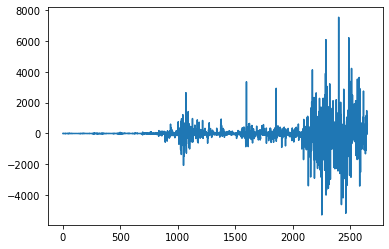

In [21]:
plt.plot(model.predict(X) - y)

**Сравнене актуальных и предсказанных цен**

In [29]:
dat = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dat


,Actual,Predicted
2469,65474.00,63994.065310
173,282.34,275.975390
1229,6151.93,6327.173556
2140,23427.00,22893.421279
1199,7576.70,7684.996410
...,...,...
1849,8788.60,8831.377294
306,436.02,437.915252
287,319.24,326.748258
694,1137.30,1041.964016


**Фактические значени яблизки к прогнозным**